In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
# from feature_engine.encoding import OrdinalEncoder
from feature_engine.imputation import CategoricalImputer

from sklearn_pandas import DataFrameMapper
# https://github.com/scikit-learn-contrib/sklearn-pandas

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, recall_score, f1_score, precision_score, plot_roc_curve, RocCurveDisplay, auc, roc_auc_score, accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

from IPython.display import HTML

import helpers as hp


In [2]:
df = pd.read_csv('income-db.csv')#.drop(columns = ['educational-num'])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


* `age`: Edad del individuo.
* `workclass`: Naturaleza de la organización que emplea al individuo.
* `education`: Nivel educacional del individuo:
    | Variable          | Explicación                       |
    | ----------------- | ------------------                |
    | __Bachelors__     | (Licenciado)                      |
    | __Some-college__  | (Superior incompleta)             |
    | __11th__          | (3ro medio)                       |
    | __HS-grad__       | (Secundaria completa)             |
    | __Prof-school__   | (Escuela profesional)             |
    | __ssoc-acdm__     | (Técnico superior administrativo) |
    | __Assoc-voc__     | (Técnico superior vocacional)     |
    | __9th__           | (1ro medio)                       |
    | __7th-8th__       | (7mo-8vo)                         |
    | __12th__          | (4to medio)                       |
    | __Masters__       | (Maestría de postgrado)           |
    | __1st-4th__       | (1ro-4to básico)                  |
    | __10th__          | (2do medio)                       |
    | __Doctorate__     | (Doctorado)                       |
    | __5th-6th__       | (5to-6to)                         |
    | __Preschool__     | (Preescolar).                     |
     
    <br>  
    
* `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado
* `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
* `fnlwgt`: Ponderador muestral.
* `marital-status`: Estado civil del individuo: 
    | Variable                  | Explicación                   |
    | ---------------------     | ------------------            |
    | __Married-civ-spouse__    | (Casado/a régimen civil)      |
    | __Divorced__              | (Divorciado/a),               |
    | __Never-married__         | (Soltero/a)                   |
    | __Separated__             | (Separado/a),                 |
    | __Widowed__               | (Viudo/a)                     |
    | __Married-spouse-absent__ | (Casado con esposo/a ausente) |
    | __Married-AF-spouse__     | (Casado/a régimen castrense). |  
 
    <br>  
    
* `occupation`: Ocupación del individuo: 

    | Variable              | Explicación                           |
    | --------------------- | ------------------                    |
    | __Tech-support__      | (Soporte técnico),                    |
    | __Craft-repair__      | (Reparaciones),                       |
    | __Other-service__     | (Otros servicios),                    |
    | __Sales__             | (Ventas)                              |
    | __Exec-managerial__   | (Ejecutivo administrativos),          |
    | __Prof-specialty__    | (Profesores)                          |
    | __Handlers-cleaners__ | (Aseo y ornato)                       |
    | __Machine-op-inspct__ | (Inspectores de maquinarias)          |
    | __Adm-clerical__      | (Administrativos servicio al cliente) |
    | __Farming-fishing__   | (Pesca-ganadería),                    |
    | __Transport-moving__  | (Transporte)                          |
    | __Priv-house-serv__   | (Asesor del hogar)                    |
    | __Protective-serv__   | (servicios de seguridad)              |
    | __Armed-Forces__      | (Fuerzas armadas).                    |
 
    <br>  
    
* `relationship`: Relación respecto a su familia 

    | Variable              | Explicación                   |
    | --------------------- | ------------------            |
    | __Wife__              | (Esposa)                      |
    | __Own-child__         | (hijo único)                  |
    | __Husband__           | (Esposo)                      |
    | __Not-in-family__     | (No pertenece a la familia)   |
    | __Other-relative__    | (Familiar de otro tipo)       |
    | __Unmarried__         | (Soltero).                    |
     
    <br>  
    
* `race`: Raza del encuestado 
    | Variable                  | Explicación                               |
    | ---------------------     | ------------------                        |
    | __White__                 | (Blanco caucásico)                        |
    | __Asian-Pac-Islander__    | (Isleño del Asia Pacífico)                |
    | __Amer-Indian-Eskimo__    | (Pertenenciente a pueblos originarios)    |
    | __Other__                 | (Otro grupo )                             |
    | __Black__                 | (Afroamericano).                          |
         
    <br>  
    
* `sex`: Sexo del encuestado.
* `hours-per-week`: Cantidad de horas trabajadas por semana.
* `native-country`: País de origen. 

    | Países | | | | | |
    | ------- | ------- | ------- | ------- | ------- | ------- |
    | United-States| Cambodia| England| Puerto-Rico| Canada| Germany |
    | Outlying-US(Guam-USVI-etc)| India| Japan| Greece| South| China |
    | Cuba| Iran| Honduras| Philippines| Italy| Poland |
    | Jamaica| Vietnam| Mexico| Portugal| Ireland| France |
    | Dominican-Republic| Laos| Ecuador| Taiwan| Haiti| Columbia |
    | Hungary| Guatemala| Nicaragua| Scotland| Thailand| Yugoslavia |
    | El-Salvador| Trinadad&Tobago| Peru| Hong| Holand-Netherlands | |
     
    <br>  
    
* `income` (Este es su vector objetivo): 
    - __<=50K__ Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, 
    - __>50K__ si el individuo percibe ingresos superiores a 50.000 dólares anuales. 





In [3]:
# df.info(verbose=True, show_counts=True,memory_usage=False)

In [4]:
# df.dtypes

In [5]:
y = np.where(df.income == "<=50K", 0, 1) # if vectorizado  
X = df.drop(columns=['income'])

In [6]:
# cat_variables, num_variables = hp.get_type_vars(X)
# hp.describe_variables(X)

In [7]:
recoding_classes = {
    "occupation": {
                    "white-collar"      : ["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"],
                    "blue-collar"       : ["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", "Protective-serv", "Priv-house-serv"],
                    "others"            : ["Other-service", "Armed-Forces"]
                },
    "workclass": {
                    "federal-gov"       : ["Federal-gov"],
                    "state-level-gov"   : ["State-gov", "Local-gov"],
                    "self-employed"     : ["Self-emp-inc", "Self-emp-not-inc"],
                    "unemployed"        : ["Never-worked", "Without-pay"]
    },
    "education": {
                    "preschool"         : ["Preschool"],
                    "elementary-school" : ["1st-4th", "5th-6th"],
                    "high-school"       : ["7th-8th", "9th", "10th","11th", "12th", "HS-grad"],
                    "college"           : ["Assoc-voc", "Assoc-acdm", "Some-college"],
                    "university"        : ["Bachelors", "Masters", "Prof-school", "Doctorate"]
    },
    "marital-status": {
                    "married"           : ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"],
                    "divorced"          : ["Divorced"],
                    "separated"         : ["Separated"],
                    "widowed"           : ["Widowed"]
    },
    "native-country": {
                    "america": ["United-States", "Puerto-Rico", "Canada", "Honduras", "Mexico", "Columbia", "Haiti", "Peru", "Ecuador", "El-Salvador", "Jamaica", "Cuba", "Dominican-Republic", "Guatemala", "Nicaragua", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)"],
                    "europe"            : ["England","Greece","Germany","France","Yugoslavia","Ireland","Holand-Netherlands","Scotland","Poland","Portugal","Italy","Hungary"],
                    "asia"              : ["Cambodia", "India", "Japan", "China","Philippines","South","Thailand","Hong","Laos","Taiwan","Vietnam","Iran"],
                    "oceania"           : [],
                    "africa"            : []
    }
}

# cat_variables, num_variables = hp.get_type_vars(X)
for variable in recoding_classes.keys():
    for class_name in recoding_classes[variable].keys():
        X[variable].mask(X[variable].isin(recoding_classes[variable][class_name]), class_name, inplace=True)
# hp.describe_variables(df)

In [8]:
recoding_variables = {
    "ocupation"         : "collars",
    "workclass"         : "workclass_recod",
    "education"         : "educ_recod",
    "marital-status"    : "civstatus",
    "native-country"    : "region"
}
X.rename(columns=recoding_variables, inplace=True)
pd.DataFrame(pd.Series(X.columns).T).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region


In [9]:
# X

In [10]:
X.replace('?', np.nan, inplace=True)

# Definiciones del Pipeline

In [11]:
# Pipeline definition.

# Scalers
sc = StandardScaler()

# Encoders
oe = OrdinalEncoder()
# ohe = SklearnTransformerWrapper(OneHotEncoder(drop_last = True), variables=cat_variables.to_list())
ohe = lambda df: OneHotEncoder(drop_last = True, variables=df.select_dtypes(include=['object','string']).columns.to_list())   # va a depender de la matriz que se encodee por que tendran distinto número de columnas categóricas

# Non-linear Transformations
pl = lambda df: SklearnTransformerWrapper(PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), variables = df.select_dtypes(include=['number']).columns.to_list())
# https://www.reddit.com/r/learnmachinelearning/comments/a7rggk/is_it_okay_to_add_polynomial_features_to/

# Imputers
ci          = lambda df: CategoricalImputer(imputation_method='frequent', variables = df.select_dtypes(include=['object','string']).columns.to_list())
si          = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=1, weights="uniform")
# https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline
imp_mean    = IterativeImputer(random_state=42)

# Dimensionality reduction
pca = lambda comps: PCA(random_state=42, n_components=comps)

# Clasificadores
lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000)

# Valditation method
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Imputación (se encodea y desencodea para usar KNNImputer)

In [12]:
# Encodeo de variables categoricas usando OrdinalEncoder. Este encodeo se hace para poder utilizar los imputadores como KNNImputer.
encoded_features = oe.fit_transform(X.copy())
df_enc = pd.DataFrame(encoded_features, index=X.index, columns=X.columns)
df_enc.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0
3,27.0,0.0,11201.0,0.0,9.0,2.0,0.0,0.0,2.0,1.0,98.0,0.0,39.0,0.0
4,1.0,NaN,5411.0,0.0,9.0,0.0,NaN,3.0,4.0,0.0,0.0,0.0,29.0,0.0


In [13]:
# Diccionario que relaciona las categorias reales con las categorias encodeadas. Se usará para restaurar los nombres de categorías originales.
encoding = oe.categories_   # categorias encodeadas
cat_variables, _ = hp.get_type_vars(X)
encoding_full = {feature_name: hp.encoding_feature(encoding[feature_pos]) for feature_name,feature_pos in zip(df.columns, range(len(df.columns))) if feature_name in cat_variables} 
# hp.pretty(encoding_full)

In [14]:
# Imputación con SimpleImputer de variables encodeadas con OrdinalEncoder
imputed_features_simple = si.fit_transform(df_enc.copy())
df_imp_simple = pd.DataFrame(imputed_features_simple, index=X.index, columns=X.columns)
df_imp_simple.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0
3,27.0,0.0,11201.0,0.0,9.0,2.0,0.0,0.0,2.0,1.0,98.0,0.0,39.0,0.0
4,1.0,0.0,5411.0,0.0,9.0,0.0,2.0,3.0,4.0,0.0,0.0,0.0,29.0,0.0


In [15]:
# Imputación con K-NearestNeighbourImputer de variables encodeadas con OrdinalEncoder
imputed_features = knn_imputer.fit_transform(df_enc.copy())
df_imp_knn = pd.DataFrame(imputed_features, index=X.index, columns=X.columns)
df_imp_knn.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0
3,27.0,0.0,11201.0,0.0,9.0,2.0,0.0,0.0,2.0,1.0,98.0,0.0,39.0,0.0
4,1.0,0.0,5411.0,0.0,9.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,29.0,0.0


In [16]:
# Una vez imputadas, las variables categoricas se restauran en sus valores originales.
df_imp_simple_or = pd.DataFrame(oe.inverse_transform(df_imp_simple), index=X.index, columns=X.columns).convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True, convert_boolean=True, convert_floating=True)
df_imp_knn_or    = pd.DataFrame(oe.inverse_transform(df_imp_knn)   , index=X.index, columns=X.columns).convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True, convert_boolean=True, convert_floating=True)

In [17]:
# Acá se despliega información sobre como quedaron las variables después de la imputación y encodeo.
if False:
    null_values = {}
    cat_variables = df.select_dtypes(include=['object']).columns
    for col in cat_variables:
        display(pd.DataFrame(              df[col].value_counts()).T.style.pipe(hp.make_pretty))
        display(pd.DataFrame(   df_imp_knn_or[col].value_counts()).T.style.pipe(hp.make_pretty))
        display(pd.DataFrame(df_imp_simple_or[col].value_counts()).T.style.pipe(hp.make_pretty))
    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')
    for cat in cat_variables:
        display(pd.DataFrame(
            {
                'pre-imputation':                                              df[cat].value_counts(normalize=True),
                'post-imputation':          df_imp_knn_or[cat].map(encoding_full[cat]).value_counts(normalize=True),
                'post-imputation-simple':df_imp_simple_or[cat].map(encoding_full[cat]).value_counts(normalize=True)
            }).T.style.pipe(hp.make_pretty, num_format='{:,.8%}'))

    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')
    hp.describe_variables(df_imp_simple_or)
    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')
    hp.describe_variables(df_imp_knn_or)

In [18]:
X_knn    = df_imp_knn_or
X_simple = df_imp_simple_or
# cat_variables_knn   , num_variables_knn    = hp.get_type_vars(X_knn)
# cat_variables_simple, num_variables_simple = hp.get_type_vars(X_simple)
# display(X_knn.loc[:,cat_variables_knn.to_list()].astype('str').dtypes)
# display(X_simple.loc[:,cat_variables_simple.to_list()].astype('str').dtypes)
# display(X_knn)
# display(X_simple)


# Pre-procesamiento previo a la clasificación con Logistic Regresor (Encoding final y Estandarización)

In [19]:
# Pipelines para encodear nuevamente y escalar la data.
pipe_ohe_knn    = Pipeline(steps = [
                        ('ohe',ohe(X_knn)),
                        ('sc',sc),
                        ])

pipe_oe_knn     = Pipeline(steps = [
                        ('oe',oe),
                        ('sc',sc),
                        ])
                        
pipe_ohe_simple = Pipeline(steps = [
                        ('ohe',ohe(X_simple)),
                        ('sc',sc),
                        ])

pipe_oe_simple  = Pipeline(steps = [
                        ('oe',oe),
                        ('sc',sc),
                        ])

pipe_oe_knn_pca    = Pipeline(steps = [
                        ('oe',oe),
                        ('pca', pca(comps=20)),
                        ('sc',sc),
                        ])

pipe_oe_simple_pca = Pipeline(steps=[
                        ('oe', oe),
                        ('pca', pca(comps=20)),
                        ('sc', sc),
                    ])

# pipe_ohe_knn_pl    = Pipeline(steps = [
#                         ('pl' , pl(X_knn)),
#                         ('ohe', ohe(X_knn)),
#                         ('sc' , sc),
#                         ])

X_pipe_ohe_knn      = pipe_ohe_knn.fit_transform(X_knn.copy())
X_pipe_oe_knn       = pipe_oe_knn.fit_transform(X_knn.copy())
X_pipe_ohe_simple   = pipe_ohe_simple.fit_transform(X_simple.copy())
X_pipe_oe_simple    = pipe_oe_simple.fit_transform(X_simple.copy())
X_pipe_oe_knn_pca   = pipe_oe_knn_pca.fit_transform(X_knn.copy())
X_pipe_oe_simple_pca= pipe_oe_simple_pca.fit_transform(X_simple.copy())

df_final_ohe_knn        = pd.DataFrame(X_pipe_ohe_knn       , columns = pipe_ohe_knn['ohe'].get_feature_names_out())
df_final_oe_knn         = pd.DataFrame(X_pipe_oe_knn        , columns = pipe_oe_knn['oe'].get_feature_names_out() )
df_final_ohe_simple     = pd.DataFrame(X_pipe_ohe_simple    , columns = pipe_ohe_simple['ohe'].get_feature_names_out())
df_final_oe_simple      = pd.DataFrame(X_pipe_oe_simple     , columns = pipe_oe_simple['oe'].get_feature_names_out())
df_final_oe_knn_pca     = pd.DataFrame(X_pipe_oe_knn_pca    )
df_final_oe_simple_pca  = pd.DataFrame(X_pipe_oe_simple_pca )
# df_final_ohe_knn_pl = pd.DataFrame(pipe_ohe_knn_pl.fit_transform(X_knn.copy()))

display(df_final_ohe_knn.head())
display(df_final_oe_knn.head())
display(df_final_ohe_simple.head())
display(df_final_oe_simple.head())
display(df_final_oe_knn_pca.head())
display(df_final_oe_simple_pca.head())
# display(df_final_ohe_knn_pl.head())

data_processed = {
    'ohe_knn'   : df_final_ohe_knn,
    'oe_knn'    : df_final_oe_knn,
    'ohe_simple': df_final_ohe_simple,
    'oe_simple' : df_final_oe_simple,
    'oe_knn_pca': df_final_oe_knn_pca,
    'oe_simple_pca': df_final_oe_simple_pca,
    # 'ohe_knn_pl': df_final_ohe_knn_pl
}

models = ['ohe_knn', 'oe_knn', 'ohe_simple', 'oe_simple', 'oe_knn_pca', 'oe_simple_pca'] # , 'ohe_knn_pl']


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_recod_Private,workclass_recod_state-level-gov,workclass_recod_self-employed,workclass_recod_federal-gov,educ_recod_high-school,educ_recod_college,educ_recod_university,educ_recod_elementary-school,civstatus_Never-married,civstatus_married,civstatus_widowed,civstatus_divorced,occupation_blue-collar,occupation_others,relationship_Own-child,relationship_Husband,relationship_Not-in-family,relationship_Unmarried,relationship_Wife,race_Black,race_White,race_Asian-Pac-Islander,race_Other,gender_Male,region_america,region_europe
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0.595843,-0.353154,-0.368628,-0.178185,1.134619,-0.651062,-0.574182,-0.125387,1.424944,-0.945118,-0.1791,-0.396417,1.353724,-0.352531,2.332956,-0.822752,-0.589093,-0.342391,-0.223869,3.070047,-2.428701,-0.179161,-0.091554,0.70422,0.202777,-0.12855
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0.595843,-0.353154,-0.368628,-0.178185,1.134619,-0.651062,-0.574182,-0.125387,-0.701782,1.058069,-0.1791,-0.396417,1.353724,-0.352531,-0.428641,1.215433,-0.589093,-0.342391,-0.223869,-0.325728,0.411743,-0.179161,-0.091554,0.70422,0.202777,-0.12855
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-1.678295,2.831624,-0.368628,-0.178185,-0.881353,1.535952,-0.574182,-0.125387,-0.701782,1.058069,-0.1791,-0.396417,1.353724,-0.352531,-0.428641,1.215433,-0.589093,-0.342391,-0.223869,-0.325728,0.411743,-0.179161,-0.091554,0.70422,0.202777,-0.12855
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0.595843,-0.353154,-0.368628,-0.178185,-0.881353,1.535952,-0.574182,-0.125387,-0.701782,1.058069,-0.1791,-0.396417,1.353724,-0.352531,-0.428641,1.215433,-0.589093,-0.342391,-0.223869,3.070047,-2.428701,-0.179161,-0.091554,0.70422,0.202777,-0.12855
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0.595843,-0.353154,-0.368628,-0.178185,-0.881353,1.535952,-0.574182,-0.125387,1.424944,-0.945118,-0.1791,-0.396417,-0.738703,2.836634,2.332956,-0.822752,-0.589093,-0.342391,-0.223869,-0.325728,0.411743,-0.179161,-0.091554,-1.42001,0.202777,-0.12855


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,-0.995129,-0.564191,0.706324,0.076604,-1.197259,-1.227226,-1.279185,0.971649,-1.971746,0.70422,-0.277867,-0.20508,-0.032267,-0.19105
1,-0.046942,-0.564191,-1.196280,0.076604,-0.419335,0.664138,-1.279185,-0.900852,0.392384,0.70422,-0.277867,-0.20508,0.781062,-0.19105
2,-0.776316,2.230839,1.462859,-1.275830,0.747550,0.664138,-1.279185,-0.900852,0.392384,0.70422,-0.277867,-0.20508,-0.032267,-0.19105
3,0.390683,-0.564191,-0.316655,-1.275830,-0.030373,0.664138,-1.279185,-0.900852,-1.971746,0.70422,3.797709,-0.20508,-0.032267,-0.19105
4,-1.505691,-0.564191,-1.045376,-1.275830,-0.030373,-1.227226,-0.198233,0.971649,0.392384,-1.42001,-0.277867,-0.20508,-0.845596,-0.19105


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_recod_Private,workclass_recod_state-level-gov,workclass_recod_self-employed,workclass_recod_federal-gov,educ_recod_high-school,educ_recod_college,educ_recod_university,educ_recod_elementary-school,civstatus_Never-married,civstatus_married,civstatus_widowed,civstatus_divorced,occupation_blue-collar,occupation_white-collar,relationship_Own-child,relationship_Husband,relationship_Not-in-family,relationship_Unmarried,relationship_Wife,race_Black,race_White,race_Asian-Pac-Islander,race_Other,gender_Male,region_america,region_europe
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0.575033,-0.342092,-0.358304,-0.173795,1.134619,-0.651062,-0.574182,-0.125387,1.424944,-0.945118,-0.1791,-0.396417,1.414518,-1.141204,2.332956,-0.822752,-0.589093,-0.342391,-0.223869,3.070047,-2.428701,-0.179161,-0.091554,0.70422,0.199859,-0.127393
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0.575033,-0.342092,-0.358304,-0.173795,1.134619,-0.651062,-0.574182,-0.125387,-0.701782,1.058069,-0.1791,-0.396417,1.414518,-1.141204,-0.428641,1.215433,-0.589093,-0.342391,-0.223869,-0.325728,0.411743,-0.179161,-0.091554,0.70422,0.199859,-0.127393
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-1.739029,2.923191,-0.358304,-0.173795,-0.881353,1.535952,-0.574182,-0.125387,-0.701782,1.058069,-0.1791,-0.396417,1.414518,-1.141204,-0.428641,1.215433,-0.589093,-0.342391,-0.223869,-0.325728,0.411743,-0.179161,-0.091554,0.70422,0.199859,-0.127393
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0.575033,-0.342092,-0.358304,-0.173795,-0.881353,1.535952,-0.574182,-0.125387,-0.701782,1.058069,-0.1791,-0.396417,1.414518,-1.141204,-0.428641,1.215433,-0.589093,-0.342391,-0.223869,3.070047,-2.428701,-0.179161,-0.091554,0.70422,0.199859,-0.127393
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0.575033,-0.342092,-0.358304,-0.173795,-0.881353,1.535952,-0.574182,-0.125387,1.424944,-0.945118,-0.1791,-0.396417,-0.706955,0.876267,2.332956,-0.822752,-0.589093,-0.342391,-0.223869,-0.325728,0.411743,-0.179161,-0.091554,-1.42001,0.199859,-0.127393


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,-0.995129,-0.544948,0.706324,0.076604,-1.197259,-1.227226,-1.340796,0.971649,-1.971746,0.70422,-0.277867,-0.20508,-0.032267,-0.188343
1,-0.046942,-0.544948,-1.196280,0.076604,-0.419335,0.664138,-1.340796,-0.900852,0.392384,0.70422,-0.277867,-0.20508,0.781062,-0.188343
2,-0.776316,2.304668,1.462859,-1.275830,0.747550,0.664138,-1.340796,-0.900852,0.392384,0.70422,-0.277867,-0.20508,-0.032267,-0.188343
3,0.390683,-0.544948,-0.316655,-1.275830,-0.030373,0.664138,-1.340796,-0.900852,-1.971746,0.70422,3.797709,-0.20508,-0.032267,-0.188343
4,-1.505691,-0.544948,-1.045376,-1.275830,-0.030373,-1.227226,0.835074,0.971649,0.392384,-1.42001,-0.277867,-0.20508,-0.845596,-0.188343


,0,1,2,3,4,5,6,7,8,9
0,0.706324,-0.326268,-0.873803,0.271434,-0.087109,1.073064,0.626593,1.059767,-0.151949,-0.539466
1,-1.196280,-0.259927,0.077954,0.756550,-0.414701,0.528619,-1.007823,0.267601,-0.521110,0.621156
2,1.462860,-0.299671,-0.591971,0.202289,-0.124711,-0.608232,-1.178139,-1.915297,2.411287,1.021624
3,-0.316655,3.762098,-0.449222,-0.425554,0.222364,0.916698,-0.652224,-1.518101,-0.491439,0.485920
4,-1.045375,-0.405046,-1.679438,-0.295901,0.218086,0.103185,0.524188,-1.122288,-0.312000,-0.283801


,0,1,2,3,4,5,6,7,8,9
0,0.706324,-0.326255,-0.873707,0.271713,-0.087122,1.074776,0.617838,1.062257,-0.092251,-0.523914
1,-1.196280,-0.259913,0.078152,0.756660,-0.414667,0.528248,-1.011417,0.268358,-0.476464,0.643826
2,1.462860,-0.299651,-0.592148,0.203177,-0.124794,-0.610536,-1.194576,-1.914023,2.529101,0.984295
3,-0.316655,3.762119,-0.449143,-0.425357,0.222326,0.915593,-0.657033,-1.516896,-0.395315,0.505149
4,-1.045375,-0.404926,-1.679369,-0.296027,0.218513,0.048509,0.609267,-1.149050,-0.339243,-0.381592


# Modelos Explicativos

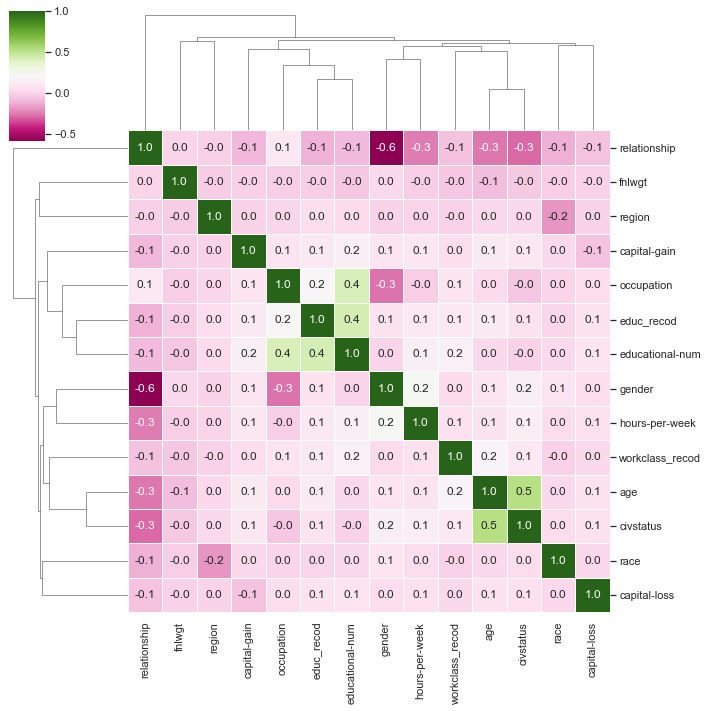

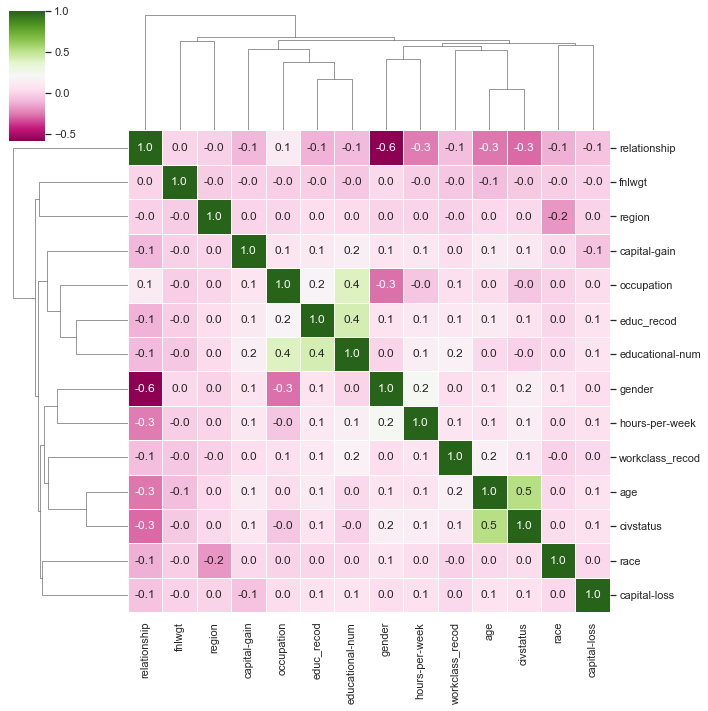

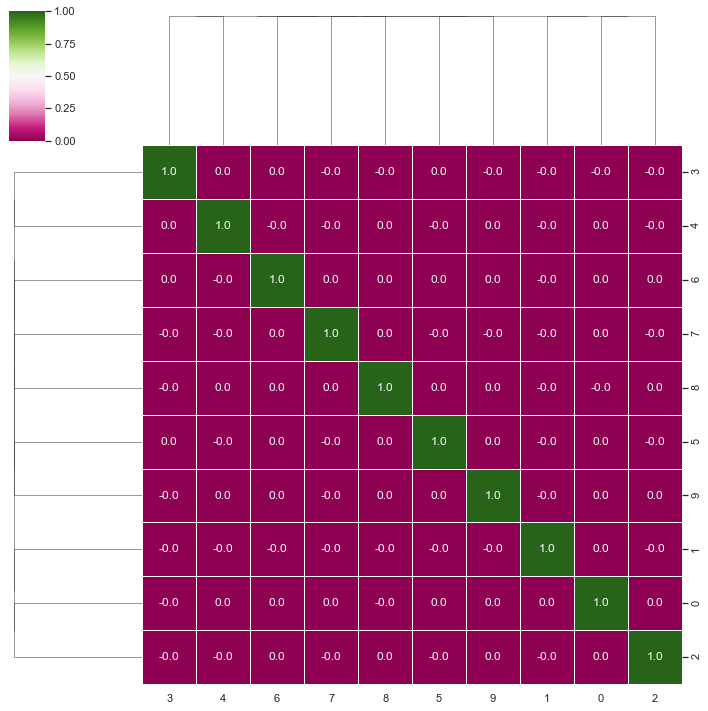

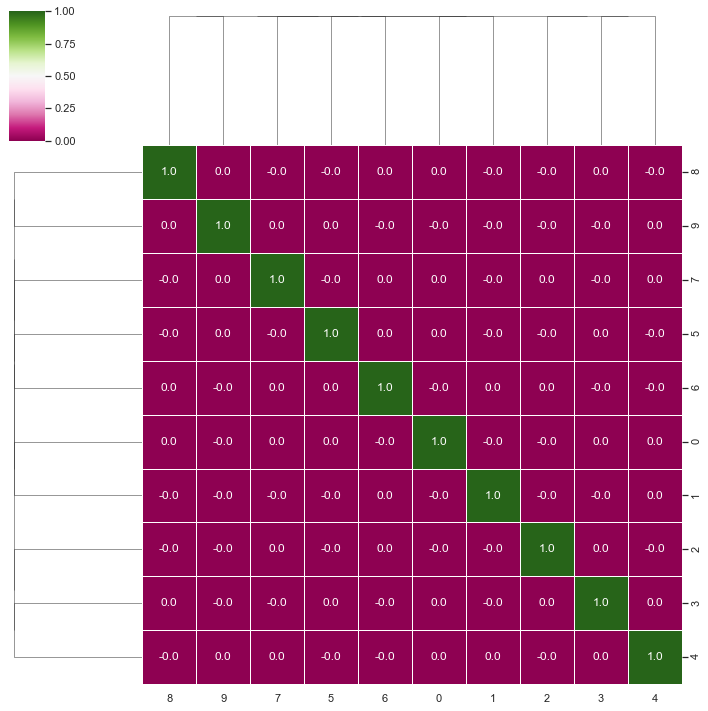

In [20]:
only_oe_models = ['oe_knn', 'oe_simple']
for model in only_oe_models:
    sns.set(font_scale=1, style='whitegrid')
    sns.clustermap(data_processed[model].corr(), annot=True, linewidth=0.9, cmap='PiYG', fmt='.1f')


In [21]:
model_expl = {}
for model in only_oe_models:
    data_ct = sm.add_constant(data_processed[model])
    model_expl[model] = sm.Logit(y, data_ct).fit()
    display(model_expl[model].summary())

Optimization terminated successfully.
         Current function value: 0.367554
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3320
Time:                        22:28:28   Log-Likelihood:                -17952.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7631      0.017   -103.488      0.000      -1.797      -1.730
age                 0.2567      0.016     15.891      0.000       0.225       0.288
workclass_recod    -0.0422      0.013     -3.227      0.001      -0.068      -0.017
fnlwgt              0.0567      0.013      4.224      0.000       0.030       0.083
educ_recod         -0.0027      0.015     -0.183      0.855      -0.032       0.026
educational-num     0.8071      0.020     41.298      0.000       0.769       0.845
civstatus           0.7358      0.017     43.427      0.000       0.703       0.769
occupation          0.2794      0.015     18.581      0.000       0.250       0.309
relationship       -0.0821      0.020     -4.201      0.000      -0.120      -0.044
race                0.1162      0.015      7.684      0.000       0.087       0.146
gender              0.5154      0.021     24.280      0.000       0.474       0.557
capital-gain        0.6448      0.014     46.246      0.000       0.617       0.672
capital-loss        0.2772      0.012     24.086      0.000       0.255       0.300
hours-per-week      0.3934      0.014     27.697      0.000       0.366       0.421
region              0.0262      0.013      2.034      0.042       0.001       0.051
===================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.368451
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3304
Time:                        22:28:29   Log-Likelihood:                -17996.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7588      0.017   -103.465      0.000      -1.792      -1.725
age                 0.2471      0.016     15.360      0.000       0.216       0.279
workclass_recod    -0.0159      0.013     -1.234      0.217      -0.041       0.009
fnlwgt              0.0579      0.013      4.318      0.000       0.032       0.084
educ_recod         -0.0029      0.015     -0.193      0.847      -0.032       0.026
educational-num     0.8205      0.020     42.039      0.000       0.782       0.859
civstatus           0.7346      0.017     43.383      0.000       0.701       0.768
occupation          0.2451      0.015     16.303      0.000       0.216       0.275
relationship       -0.0837      0.020     -4.289      0.000      -0.122      -0.045
race                0.1175      0.015      7.782      0.000       0.088       0.147
gender              0.5067      0.021     23.903      0.000       0.465       0.548
capital-gain        0.6453      0.014     46.369      0.000       0.618       0.673
capital-loss        0.2781      0.011     24.205      0.000       0.256       0.301
hours-per-week      0.3978      0.014     28.039      0.000       0.370       0.426
region              0.0284      0.013      2.214      0.027       0.003       0.054
===================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.377338
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48831
Method:                           MLE   Df Model:                           10
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3142
Time:                        22:28:29   Log-Likelihood:                -18430.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7259      0.017   -103.972      0.000      -1.758      -1.693
0             -0.0277      0.013     -2.103      0.035      -0.054      -0.002
1              1.0137      0.015     68.688      0.000       0.985       1.043
2              0.8842      0.016     56.687      0.000       0.854       0.915
3              0.5253      0.013     39.647      0.000       0.499       0.551
4              0.2018      0.011     17.813      0.000       0.180       0.224
5             -0.8656      0.015    -59.237      0.000      -0.894      -0.837
6             -0.4597      0.014    -33.332      0.000      -0.487      -0.433
7             -0.1780      0.014    -12.911      0.000      -0.205      -0.151
8             -0.0319      0.012     -2.557      0.011      -0.056      -0.007
9              0.5302      0.014     39.272      0.000       0.504       0.557
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.377461
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48831
Method:                           MLE   Df Model:                           10
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3140
Time:                        22:28:29   Log-Likelihood:                -18436.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7258      0.017   -103.952      0.000      -1.758      -1.693
0             -0.0276      0.013     -2.092      0.036      -0.053      -0.002
1              1.0134      0.015     68.687      0.000       0.984       1.042
2              0.8847      0.016     56.694      0.000       0.854       0.915
3              0.5249      0.013     39.629      0.000       0.499       0.551
4              0.2017      0.011     17.805      0.000       0.179       0.224
5             -0.8644      0.015    -59.200      0.000      -0.893      -0.836
6             -0.4613      0.014    -33.428      0.000      -0.488      -0.434
7             -0.1769      0.014    -12.834      0.000      -0.204      -0.150
8             -0.0122      0.012     -0.984      0.325      -0.036       0.012
9              0.5298      0.014     39.236      0.000       0.503       0.556
==============================================================================
"""

### El model.summary de statsmodels nos ayudará a descartar variables basandonos en el p-value.

In [22]:
model_expl = {}
only_oe_models = ['oe_knn', 'oe_simple']
vars_to_remove = ['educ_recod', 'civstatus_widowed', 'civstatus_divorced', 'race_Other', 'race_Black', 'workclass_recod']
data_processed_remove = {}
models_reduced = []
for model in models:
    real_vars_to_remove = []
    for var in vars_to_remove:
        real_vars_to_remove = real_vars_to_remove + [s for s in data_processed[model].columns.to_list() if var in str(s)]
    data_processed_remove[f"{model}_reduced"] = data_processed[model].drop(columns = real_vars_to_remove)
    data_ct = sm.add_constant(data_processed_remove[f"{model}_reduced"])
    models_reduced = models_reduced + [f"{model}_reduced"]
    model_expl[f"{model}_reduced"] = sm.Logit(y, data_ct).fit()
    print(f"--------------------------{model}_reduced------------------------------------")
    display(model_expl[f"{model}_reduced"].summary())

# Agregamos los nombres de los modelos reducidos y sus dataframes asociadas
models = models + models_reduced
data_processed = {**data_processed, **data_processed_remove}

Optimization terminated successfully.
         Current function value: 0.326202
         Iterations 9
--------------------------ohe_knn_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48821
Method:                           MLE   Df Model:                           20
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.4072
Time:                        22:28:29   Log-Likelihood:                -15932.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.9671      0.025    -79.585      0.000      -2.016      -1.919
age                            0.2948      0.017     17.385      0.000       0.262       0.328
fnlwgt                         0.0791      0.014      5.541      0.000       0.051       0.107
educational-num                0.7654      0.018     43.560      0.000       0.731       0.800
capital-gain                   2.3505      0.062     38.014      0.000       2.229       2.472
capital-loss                   0.2620      0.012     21.888      0.000       0.239       0.285
hours-per-week                 0.3626      0.015     23.943      0.000       0.333       0.392
civstatus_Never-married       -0.2346      0.031     -7.459      0.000      -0.296      -0.173
civstatus_married              0.3726      0.065      5.740      0.000       0.245       0.500
occupation_blue-collar        -0.2859      0.016    -17.784      0.000      -0.317      -0.254
occupation_others             -0.4019      0.025    -16.034      0.000      -0.451      -0.353
relationship_Own-child        -0.1794      0.072     -2.505      0.012      -0.320      -0.039
relationship_Husband           0.7479      0.090      8.333      0.000       0.572       0.924
relationship_Not-in-family     0.2364      0.075      3.153      0.002       0.089       0.383
relationship_Unmarried         0.0933      0.056      1.664      0.096      -0.017       0.203
relationship_Wife              0.5394      0.041     13.255      0.000       0.460       0.619
race_White                     0.0885      0.019      4.555      0.000       0.050       0.127
race_Asian-Pac-Islander        0.0705      0.022      3.140      0.002       0.027       0.115
gender_Male                    0.3510      0.029     12.009      0.000       0.294       0.408
region_america                 0.0756      0.026      2.861      0.004       0.024       0.127
region_europe                  0.0752      0.021      3.512      0.000       0.033       0.117
==============================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.367662
         Iterations 7
--------------------------oe_knn_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48829
Method:                           MLE   Df Model:                           12
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3318
Time:                        22:28:29   Log-Likelihood:                -17957.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7623      0.017   -103.773      0.000      -1.796      -1.729
age                 0.2487      0.016     15.610      0.000       0.217       0.280
fnlwgt              0.0578      0.013      4.307      0.000       0.031       0.084
educational-num     0.7978      0.017     48.228      0.000       0.765       0.830
civstatus           0.7349      0.017     43.382      0.000       0.702       0.768
occupation          0.2792      0.015     18.577      0.000       0.250       0.309
relationship       -0.0829      0.020     -4.241      0.000      -0.121      -0.045
race                0.1171      0.015      7.747      0.000       0.087       0.147
gender              0.5148      0.021     24.251      0.000       0.473       0.556
capital-gain        0.6446      0.014     46.260      0.000       0.617       0.672
capital-loss        0.2770      0.012     24.086      0.000       0.254       0.300
hours-per-week      0.3907      0.014     27.587      0.000       0.363       0.418
region              0.0268      0.013      2.083      0.037       0.002       0.052
===================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.327086
         Iterations 9
--------------------------ohe_simple_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48821
Method:                           MLE   Df Model:                           20
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.4056
Time:                        22:28:29   Log-Likelihood:                -15976.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.9597      0.025    -79.543      0.000      -2.008      -1.911
age                            0.2863      0.017     16.896      0.000       0.253       0.319
fnlwgt                         0.0797      0.014      5.598      0.000       0.052       0.108
educational-num                0.7826      0.018     44.669      0.000       0.748       0.817
capital-gain                   2.3548      0.062     38.128      0.000       2.234       2.476
capital-loss                   0.2634      0.012     22.034      0.000       0.240       0.287
hours-per-week                 0.3739      0.015     24.813      0.000       0.344       0.403
civstatus_Never-married       -0.2371      0.031     -7.540      0.000      -0.299      -0.175
civstatus_married              0.3639      0.065      5.610      0.000       0.237       0.491
occupation_blue-collar         0.3357      0.040      8.360      0.000       0.257       0.414
occupation_white-collar        0.6176      0.041     14.900      0.000       0.536       0.699
relationship_Own-child        -0.1814      0.072     -2.532      0.011      -0.322      -0.041
relationship_Husband           0.7584      0.090      8.435      0.000       0.582       0.935
relationship_Not-in-family     0.2405      0.075      3.208      0.001       0.094       0.387
relationship_Unmarried         0.0975      0.056      1.738      0.082      -0.012       0.207
relationship_Wife              0.5435      0.041     13.332      0.000       0.464       0.623
race_White                     0.0899      0.019      4.629      0.000       0.052       0.128
race_Asian-Pac-Islander        0.0695      0.022      3.104      0.002       0.026       0.113
gender_Male                    0.3450      0.029     11.804      0.000       0.288       0.402
region_america                 0.0718      0.026      2.722      0.006       0.020       0.124
region_europe                  0.0744      0.021      3.464      0.001       0.032       0.117
==============================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.368467
         Iterations 7
--------------------------oe_simple_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48829
Method:                           MLE   Df Model:                           12
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3304
Time:                        22:28:30   Log-Likelihood:                -17997.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7584      0.017   -103.759      0.000      -1.792      -1.725
age                 0.2444      0.016     15.346      0.000       0.213       0.276
fnlwgt              0.0583      0.013      4.348      0.000       0.032       0.085
educational-num     0.8154      0.017     49.404      0.000       0.783       0.848
civstatus           0.7343      0.017     43.375      0.000       0.701       0.767
occupation          0.2455      0.015     16.340      0.000       0.216       0.275
relationship       -0.0840      0.020     -4.303      0.000      -0.122      -0.046
race                0.1179      0.015      7.807      0.000       0.088       0.147
gender              0.5066      0.021     23.898      0.000       0.465       0.548
capital-gain        0.6452      0.014     46.375      0.000       0.618       0.673
capital-loss        0.2781      0.011     24.206      0.000       0.256       0.301
hours-per-week      0.3964      0.014     28.041      0.000       0.369       0.424
region              0.0286      0.013      2.231      0.026       0.003       0.054
===================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.377338
         Iterations 7
--------------------------oe_knn_pca_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48831
Method:                           MLE   Df Model:                           10
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3142
Time:                        22:28:30   Log-Likelihood:                -18430.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7259      0.017   -103.972      0.000      -1.758      -1.693
0             -0.0277      0.013     -2.103      0.035      -0.054      -0.002
1              1.0137      0.015     68.688      0.000       0.985       1.043
2              0.8842      0.016     56.687      0.000       0.854       0.915
3              0.5253      0.013     39.647      0.000       0.499       0.551
4              0.2018      0.011     17.813      0.000       0.180       0.224
5             -0.8656      0.015    -59.237      0.000      -0.894      -0.837
6             -0.4597      0.014    -33.332      0.000      -0.487      -0.433
7             -0.1780      0.014    -12.911      0.000      -0.205      -0.151
8             -0.0319      0.012     -2.557      0.011      -0.056      -0.007
9              0.5302      0.014     39.272      0.000       0.504       0.557
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.377461
         Iterations 7
--------------------------oe_simple_pca_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48831
Method:                           MLE   Df Model:                           10
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.3140
Time:                        22:28:30   Log-Likelihood:                -18436.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7258      0.017   -103.952      0.000      -1.758      -1.693
0             -0.0276      0.013     -2.092      0.036      -0.053      -0.002
1              1.0134      0.015     68.687      0.000       0.984       1.042
2              0.8847      0.016     56.694      0.000       0.854       0.915
3              0.5249      0.013     39.629      0.000       0.499       0.551
4              0.2017      0.011     17.805      0.000       0.179       0.224
5             -0.8644      0.015    -59.200      0.000      -0.893      -0.836
6             -0.4613      0.014    -33.428      0.000      -0.488      -0.434
7             -0.1769      0.014    -12.834      0.000      -0.204      -0.150
8             -0.0122      0.012     -0.984      0.325      -0.036       0.012
9              0.5298      0.014     39.236      0.000       0.503       0.556
==============================================================================
"""

# Clasificación (Cross Validation KFold(5))

In [23]:
models

['ohe_knn',
 'oe_knn',
 'ohe_simple',
 'oe_simple',
 'oe_knn_pca',
 'oe_simple_pca',
 'ohe_knn_reduced',
 'oe_knn_reduced',
 'ohe_simple_reduced',
 'oe_simple_reduced',
 'oe_knn_pca_reduced',
 'oe_simple_pca_reduced']

In [24]:
cvs   = {}
scorings = {"accuracy": "accuracy", "precision" : "precision", "recall": "recall","f1_score":"f1", "roc_auc":"roc_auc"}
metrics = scorings.keys()
for model in models:
    # dict_metrics = {}
    cvs[model] = cross_validate(lr, data_processed[model], y, cv=cv, scoring = scorings)
    # for metric in metrics:
    #     dict_metrics[metric] = cross_val_score(lr, data_processed[model], y, cv=cv, scoring = metric)
    # cvs[model] = dict_metrics

In [25]:
table_str = '<table><tr><th>Models</th><th>' + '</th><th>'.join(metrics) + '</th><th>Nº de variables</th></tr>'

for model in models:
    table_str += '<tr>'
    table_str += f"<td>{model}</td>"
    for metric in metrics:
        table_str += f"<td>{cvs[model]['test_'+metric].mean():.4f}</td>"
    table_str += f"<td>{len(data_processed[model].columns.to_list())}</td>"
    table_str += '</tr>'

display(HTML(table_str))

Models,accuracy,precision,recall,f1_score,roc_auc,Nº de variables
ohe_knn,0.8484,0.7256,0.5892,0.6502,0.9016,32
oe_knn,0.8326,0.7095,0.5088,0.5926,0.8688,14
ohe_simple,0.8481,0.7261,0.5863,0.6486,0.9009,32
oe_simple,0.8316,0.7071,0.5060,0.5898,0.8681,14
oe_knn_pca,0.8266,0.7021,0.4785,0.5690,0.8609,10
oe_simple_pca,0.8266,0.7019,0.4787,0.5690,0.8608,10
ohe_knn_reduced,0.8469,0.7230,0.5840,0.6460,0.9008,20
oe_knn_reduced,0.8323,0.7088,0.5078,0.5916,0.8688,12
ohe_simple_reduced,0.8467,0.7236,0.5812,0.6445,0.9002,20
oe_simple_reduced,0.8316,0.7070,0.5060,0.5898,0.8682,12
